In [16]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from numpy.lib.stride_tricks import as_strided

## Func

In [17]:
# def _sub(I, T):
    

## path

In [18]:
path = '../img'
tot_list = os.listdir(path)
img_type = []
for i in tot_list:
    img_type.append(i.split('-')[0])
img_type = np.unique(np.array(img_type))


img_list, tpl_list = [], []
for j in tot_list:
    k = j.replace('.', '-')
    if k.split('-')[0]==img_type[0] and k.split('-')[-2]!='MatchResult':
        if k.split('-')[-2]=='Template':
            tpl_list.append(j)
        else:
            img_list.append(j)



## img

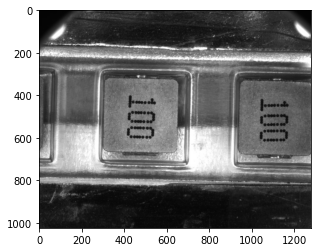

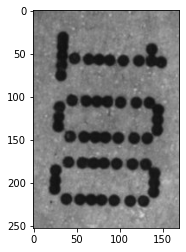

In [19]:
img_org = cv2.imread(os.path.join(path, img_list[0]))
tpl = cv2.imread(os.path.join(path, tpl_list[0]))

fig = plt.figure()
plt.imshow(img_org)

fig = plt.figure()
plt.imshow(tpl)

## View

In [20]:
I = cv2.cvtColor(img_org, cv2.COLOR_BGR2GRAY)
T = cv2.cvtColor(tpl, cv2.COLOR_BGR2GRAY)
view_shape = tuple(np.subtract(I.shape, T.shape) + 1) + T.shape
strides = I.strides + I.strides
sub_matrices = as_strided(I, view_shape, strides)
h_, w_, h, w = sub_matrices.shape

def _nor(X, h, w):
    X_ = X - np.sum(X) / (h*w)
    return X_

def _CC(X, Y):
    res = np.sum(X * Y) / np.sqrt(np.sum(X**2) * np.sum(Y**2))
    return res

from itertools import product
L = []
T_ = _nor(T, h, w)
for y, x in product(range(h_), range(w_)):
    S_ = _nor(sub_matrices[y, x, :, :], h, w)
    L.append(_CC(T_, S_))

    # print(str(x) + '_' + str(y))




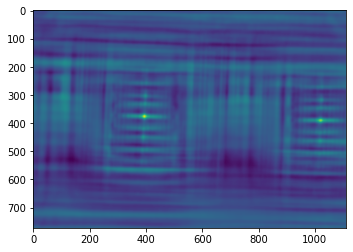

In [22]:
res = np.array(L).reshape(h_, w_)

# res = np.einsum('klij, ij->kl', sub_matrices, T)

fig = plt.figure()
plt.imshow(res)
